In [43]:
import torch
import trimesh
import numpy as np

try:
    from smplx.body_models import SMPLX
except ImportError:
    raise ValueError("`pip install smplx` and download the SMPLX model data from https://smpl-x.is.tue.mpg.de/downloads")

from body_visualizer.mesh.mesh_viewer import MeshViewer
from body_visualizer.tools.vis_tools import show_image

# Choose the device to run the body model on.
comp_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(torch.backends.mps.is_available())

# Preparing the environment
%load_ext autoreload
%autoreload 2
%matplotlib notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### INPUT

In [47]:
AMASS_NPZ_FILE_NAME = "/home/or/school/amass/data/ACCAD/Female1General_c3d/A5_-_pick_up_box_stageii.npz" # the path to body data
PATH_TO_SMPLX_MODELS = "/home/or/school/smplx/models/smplx" # this is the local path to th SMPL-X models files downloaded from here https://smpl-x.is.tue.mpg.de/downloads
FRAME_TO_VISUIALIZE = 300

In [42]:

bdata = np.load(AMASS_NPZ_FILE_NAME)

subject_gender = bdata['gender']
frame_length = bdata['pose_body'].shape[0]

print(f'The subject of the mocap sequence is  {subject_gender}. and is {frame_length} frames long. ')

model_path = f'{PATH_TO_SMPLX_MODELS}/SMPLX_{str(subject_gender).upper()}.npz'
smplx_model = SMPLX(model_path=model_path).to(comp_device)

imw, imh=1600, 1600
mv = MeshViewer(width=imw, height=imh, use_offscreen=True)

The subject of the mocap sequence is  neutral. and is 754 frames long. 


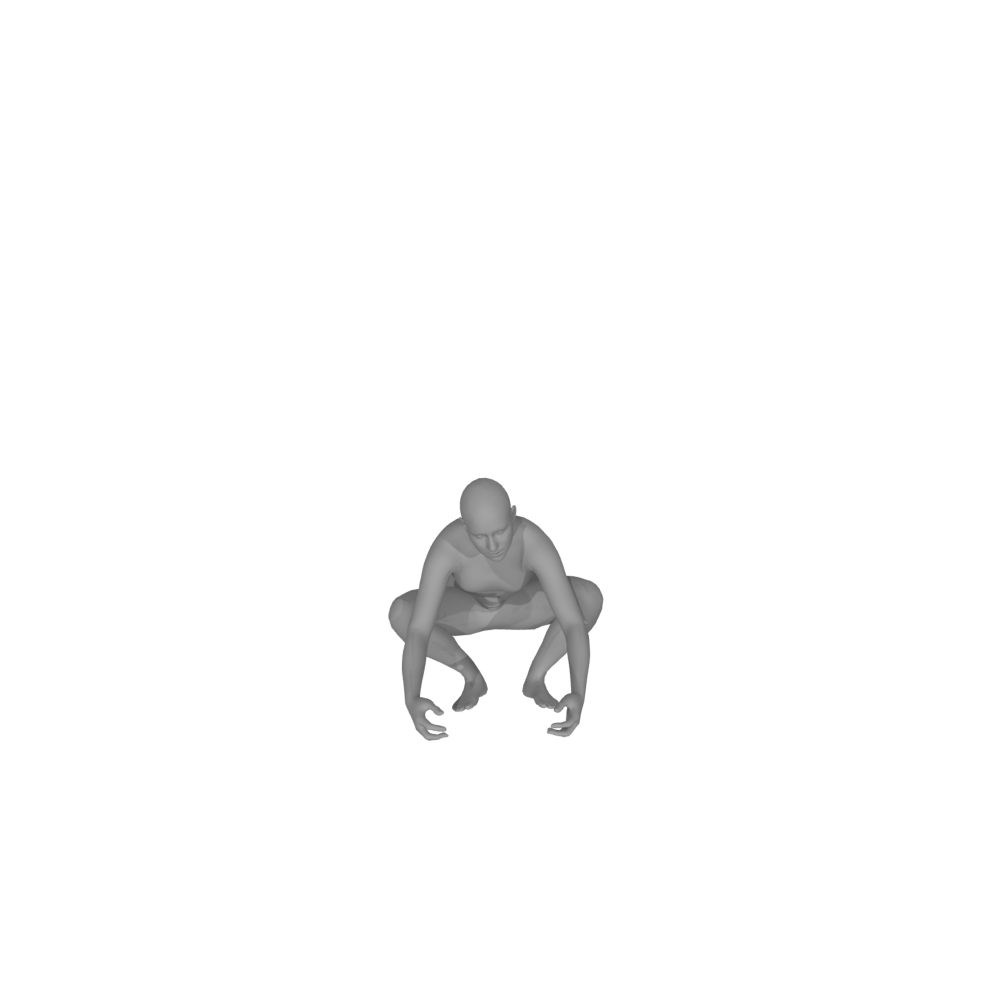

In [48]:
body_pose = bdata['pose_body'][FRAME_TO_VISUIALIZE]
body_pose = torch.Tensor(body_pose).to(comp_device)[None]
faces = smplx_model.faces
verts = smplx_model(body_pose=body_pose).vertices[0].cpu()
mesh = trimesh.Trimesh(vertices=verts.cpu().detach().numpy(), faces=smplx_model.faces)
mv.set_static_meshes([mesh])
body_image = mv.render(render_wireframe=False)
show_image(body_image)